# Sequential Neural Network
In this notebook I will train a Sequential Neural Network for classification of erosion.

In [ ]:
# Adjust the frac parameter for loess smoothing
# to control the degree of smoothing applied to the scan data.
labeled_dir = "../../scandata/slices loess frac=0.10_labeled"

masks_path = "../stratified_k-fold_masks.npy"

DetectionNotClassification = False  # Set to True to replace all non-zero labels with 1

Libraries used:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.metrics import AUC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

from sklearn.preprocessing import StandardScaler

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Use GPU if available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)


2025-08-18 16:09:25.477859: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-18 16:09:25.490200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755533365.503954   10574 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755533365.507980   10574 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755533365.519733   10574 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Num GPUs Available: 1
TensorFlow version: 2.19.0


In [3]:
all_masks = np.load(masks_path, allow_pickle=True)

# List all labeled files
labeled_files = [f for f in os.listdir(labeled_dir) if f.endswith("_slices_labeled.npy")]
selected_files = labeled_files  # Use all files by default

In [4]:
# Load features (X) and labels (y) for each file
all_X = []
all_y = []
for labeled_file in selected_files:
    data = np.load(os.path.join(labeled_dir, labeled_file), allow_pickle=True).item()
    slices = data["slices"]  # shape: (num_slices, max_points, 3)
    labels = data["labels"]  # shape: (num_slices,)

    X = slices[:, :, 2]  # shape: (num_slices, max_points)
    if DetectionNotClassification:
        y = (labels != 0).astype(int)
    else:
        y = labels  # keep original labels for multiclass
    all_X.append(X)
    all_y.append(y)

I0000 00:00:1755533372.612835   10574 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/50


I0000 00:00:1755533374.332584   10811 service.cc:152] XLA service 0x75681801f050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755533374.332619   10811 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-18 16:09:34.380150: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755533374.509679   10811 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.2188 - auc: 0.3965 - loss: 1.9558 - precision: 0.2391 - recall: 0.1719

I0000 00:00:1755533376.144004   10811 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 798ms/step - accuracy: 0.3752 - auc: 0.5462 - loss: 1.6318 - precision: 0.3998 - recall: 0.3009 - val_accuracy: 0.5690 - val_auc: 0.6443 - val_loss: 3.2986 - val_precision: 0.5614 - val_recall: 0.5517
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6474 - auc: 0.7940 - loss: 1.0499 - precision: 0.7059 - recall: 0.4972 - val_accuracy: 0.5862 - val_auc: 0.7064 - val_loss: 2.8718 - val_precision: 0.5862 - val_recall: 0.5862
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7298 - auc: 0.8668 - loss: 0.9029 - precision: 0.7862 - recall: 0.5921 - val_accuracy: 0.6207 - val_auc: 0.7439 - val_loss: 2.4401 - val_precision: 0.6207 - val_recall: 0.6207
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7768 - auc: 0.9117 - loss: 0.8243 - precision: 0.8378 - recall: 0.6561 - val_accuracy: 0.6207 - val_auc: 0.7576 - val_loss: 2.1107 - val_precision: 0.6207 - val_recall: 0.6207
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc

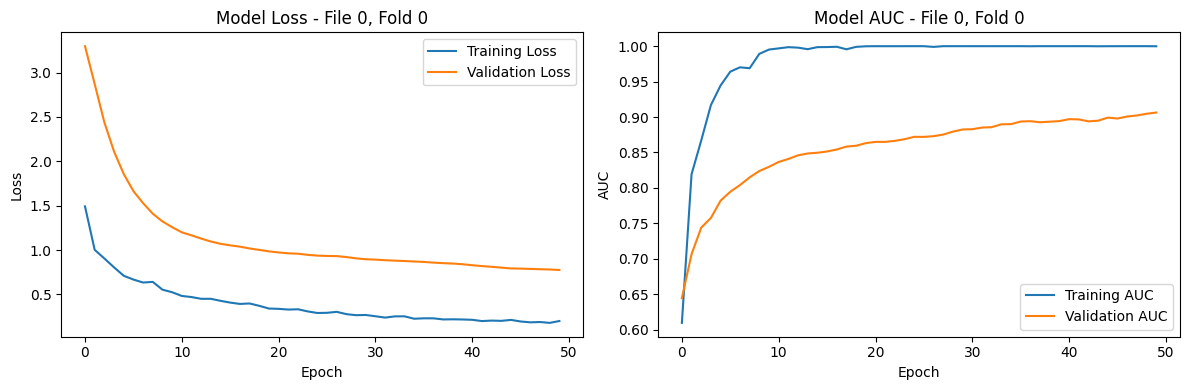

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 758ms/step - accuracy: 0.4272 - auc: 0.6095 - loss: 1.3489 - precision: 0.4757 - recall: 0.3274 - val_accuracy: 0.6897 - val_auc: 0.7988 - val_loss: 2.2726 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7528 - auc: 0.9093 - loss: 0.7878 - precision: 0.8473 - recall: 0.6586 - val_accuracy: 0.6897 - val_auc: 0.8200 - val_loss: 2.0758 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7579 - auc: 0.9192 - loss: 0.7750 - precision: 0.8450 - recall: 0.6693 - val_accuracy: 0.6897 - val_auc: 0.8343 - val_loss: 1.7760 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8033 - auc: 0.9429 - loss: 0.7118 - precision: 0.8792 - recall: 0.7086 - val_accuracy: 0.6897 - val_auc: 0.8410 - val_loss: 1.5926 - val_precision: 0.6897 - val_recall: 0.6897
Epoc

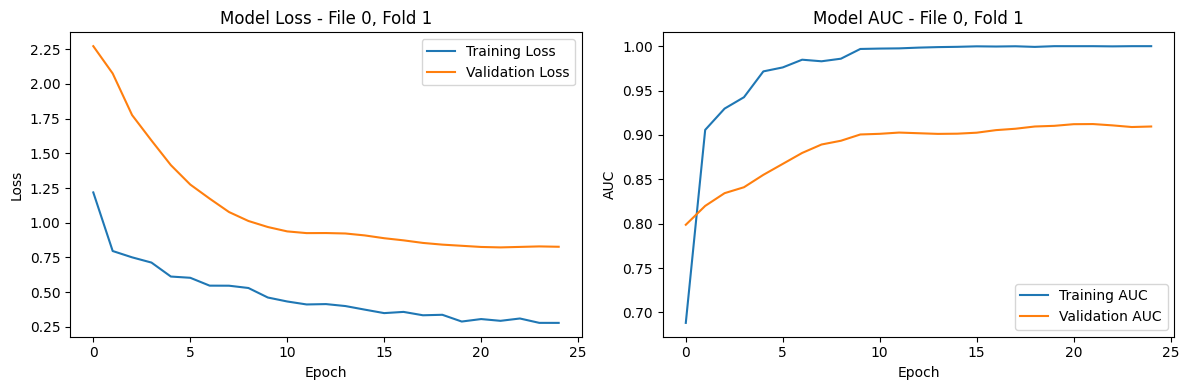

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.3886 - auc: 0.5665 - loss: 1.5540 - precision: 0.3901 - recall: 0.3073 - val_accuracy: 0.6724 - val_auc: 0.8225 - val_loss: 1.8707 - val_precision: 0.6964 - val_recall: 0.6724
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6552 - auc: 0.8441 - loss: 0.9235 - precision: 0.6978 - recall: 0.5963 - val_accuracy: 0.6897 - val_auc: 0.8452 - val_loss: 1.6265 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7675 - auc: 0.8995 - loss: 0.8018 - precision: 0.8206 - recall: 0.7053 - val_accuracy: 0.7069 - val_auc: 0.8570 - val_loss: 1.3579 - val_precision: 0.7069 - val_recall: 0.7069
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8173 - auc: 0.9505 - loss: 0.6676 - precision: 0.8840 - recall: 0.7704 - val_accuracy: 0.7586 - val_auc: 0.8847 - val_loss: 1.1913 - val_precision: 0.7586 - val_recall: 0.7586
Epoc

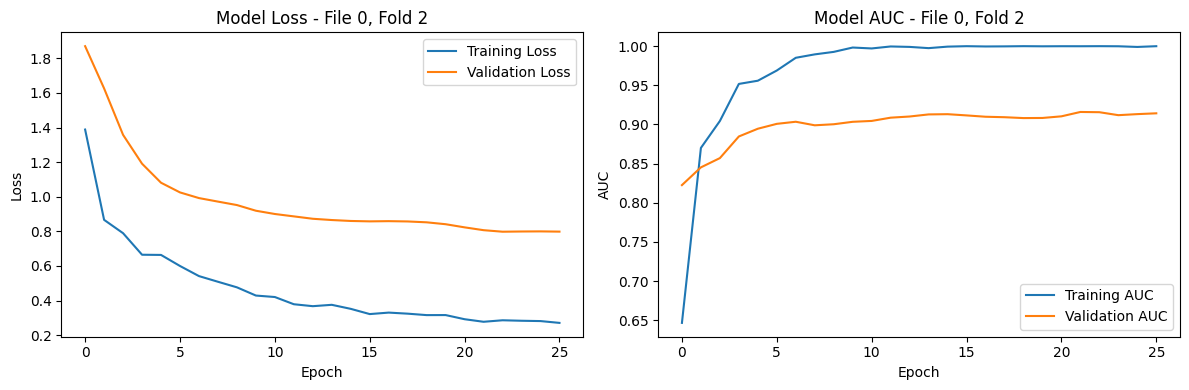

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x75698cecb7e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 727ms/step - accuracy: 0.4022 - auc: 0.5886 - loss: 1.4619 - precision: 0.4333 - recall: 0.3006 - val_accuracy: 0.5862 - val_auc: 0.8392 - val_loss: 1.4882 - val_

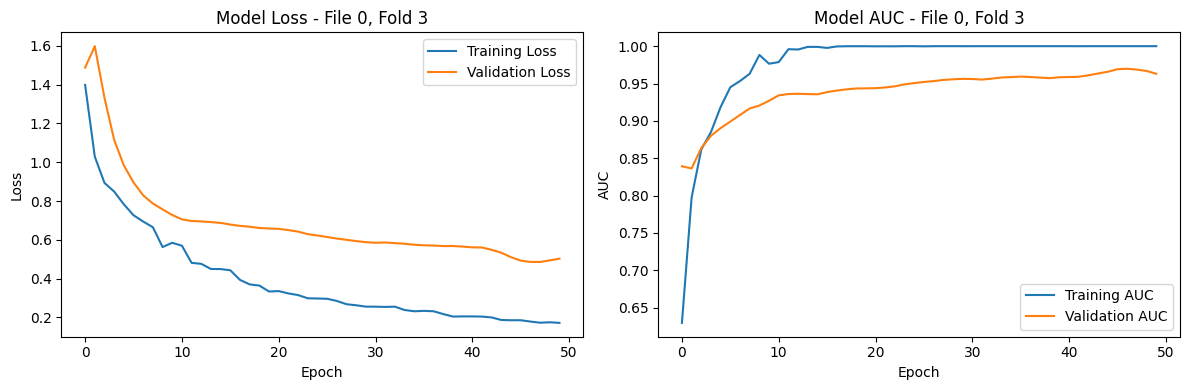

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 793ms/step - accuracy: 0.5036 - auc: 0.7025 - loss: 1.2031 - precision: 0.5744 - recall: 0.4072 - val_accuracy: 0.6897 - val_auc: 0.8475 - val_loss: 1.3296 - val_precision: 0.6897 - val_recall: 0.6897
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7787 - auc: 0.9156 - loss: 0.7708 - precision: 0.8391 - recall: 0.6410 - val_accuracy: 0.7241 - val_auc: 0.8968 - val_loss: 1.0466 - val_precision: 0.7241 - val_recall: 0.7241
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7766 - auc: 0.9218 - loss: 0.7509 - precision: 0.8276 - recall: 0.6896 - val_accuracy: 0.7241 - val_auc: 0.9067 - val_loss: 0.9323 - val_precision: 0.7368 - val_recall: 0.7241
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8427 - auc: 0.9544 - loss: 0.6682 - precision: 0.8898 - recall: 0.7656 - val_accuracy: 0.7241 - val_auc: 0.9053 - val_loss: 0.8829 - val_precision: 0.7241 - val_recall: 0.7241
Epoc

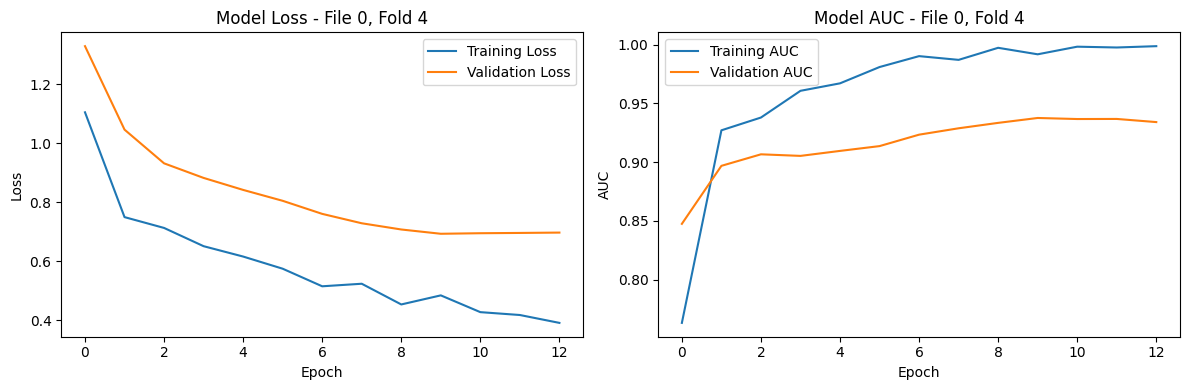

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4112 - auc: 0.5715 - loss: 1.5812 - precision: 0.3922 - recall: 0.2624 - val_accuracy: 0.5000 - val_auc: 0.6590 - val_loss: 3.6246 - val_precision: 0.5500 - val_recall: 0.5000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6965 - auc: 0.8291 - loss: 0.9996 - precision: 0.7744 - recall: 0.5739 - val_accuracy: 0.5227 - val_auc: 0.6581 - val_loss: 3.4093 - val_precision: 0.5238 - val_recall: 0.5000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7248 - auc: 0.8611 - loss: 0.9077 - precision: 0.8014 - recall: 0.6275 - val_accuracy: 0.5455 - val_auc: 0.6726 - val_loss: 2.8949 - val_precision: 0.5476 - val_recall: 0.5227
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7587 - auc: 0.8814 - loss: 0.8654 - precision: 0.8195 - recall: 0.6371 - val_accuracy: 0.5455 - val_auc: 0.6929 - val_loss: 2.4349 - val_precision: 0.6000 - val_recall: 0.5455
Epoch 5

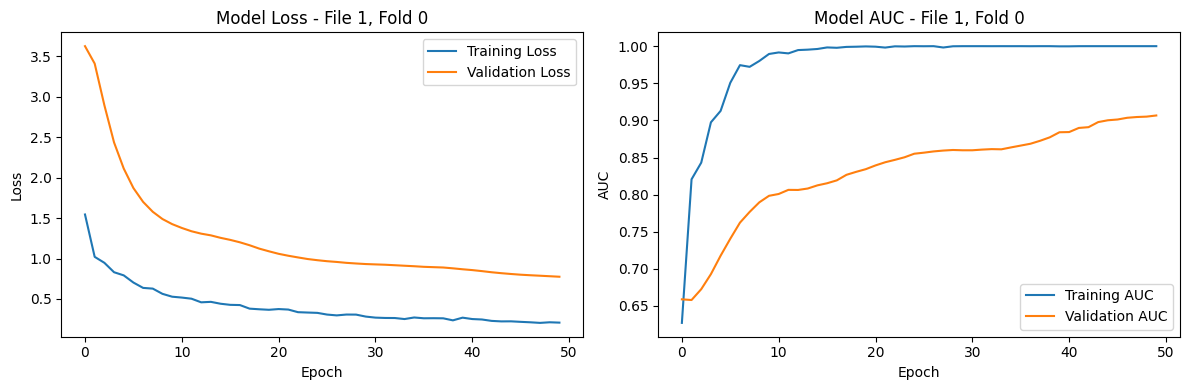

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4206 - auc: 0.6045 - loss: 1.4434 - precision: 0.4727 - recall: 0.3198 - val_accuracy: 0.5814 - val_auc: 0.6462 - val_loss: 3.2468 - val_precision: 0.5714 - val_recall: 0.5581
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7323 - auc: 0.8472 - loss: 0.9409 - precision: 0.7559 - recall: 0.5537 - val_accuracy: 0.6047 - val_auc: 0.6888 - val_loss: 2.9675 - val_precision: 0.6190 - val_recall: 0.6047
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7877 - auc: 0.9048 - loss: 0.8037 - precision: 0.8174 - recall: 0.6956 - val_accuracy: 0.6512 - val_auc: 0.7185 - val_loss: 2.4828 - val_precision: 0.6512 - val_recall: 0.6512
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8127 - auc: 0.9331 - loss: 0.7294 - precision: 0.8839 - recall: 0.7458 - val_accuracy: 0.6512 - val_auc: 0.7308 - val_loss: 2.1308 - val_precision: 0.6512 - val_recall: 0.6512
Epoch 5

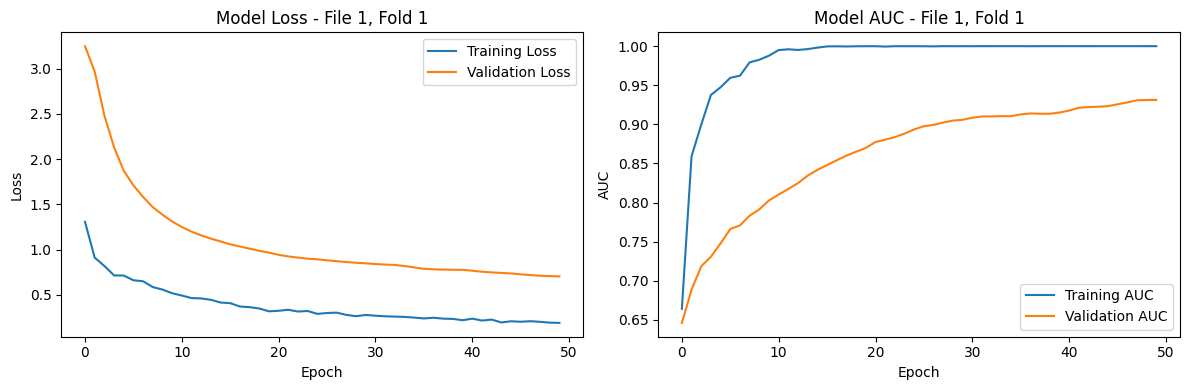

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2839 - auc: 0.4062 - loss: 2.0185 - precision: 0.2750 - recall: 0.1869 - val_accuracy: 0.3023 - val_auc: 0.5053 - val_loss: 3.7488 - val_precision: 0.3056 - val_recall: 0.2558
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4906 - auc: 0.6331 - loss: 1.3784 - precision: 0.5249 - recall: 0.3578 - val_accuracy: 0.4884 - val_auc: 0.6197 - val_loss: 3.1214 - val_precision: 0.4737 - val_recall: 0.4186
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6042 - auc: 0.7430 - loss: 1.1667 - precision: 0.6487 - recall: 0.4140 - val_accuracy: 0.5814 - val_auc: 0.7016 - val_loss: 2.5986 - val_precision: 0.5789 - val_recall: 0.5116
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6548 - auc: 0.8167 - loss: 0.9912 - precision: 0.7189 - recall: 0.5171 - val_accuracy: 0.6512 - val_auc: 0.7539 - val_loss: 2.1593 - val_precision: 0.6667 - val_recall: 0.5581
Epoch 5

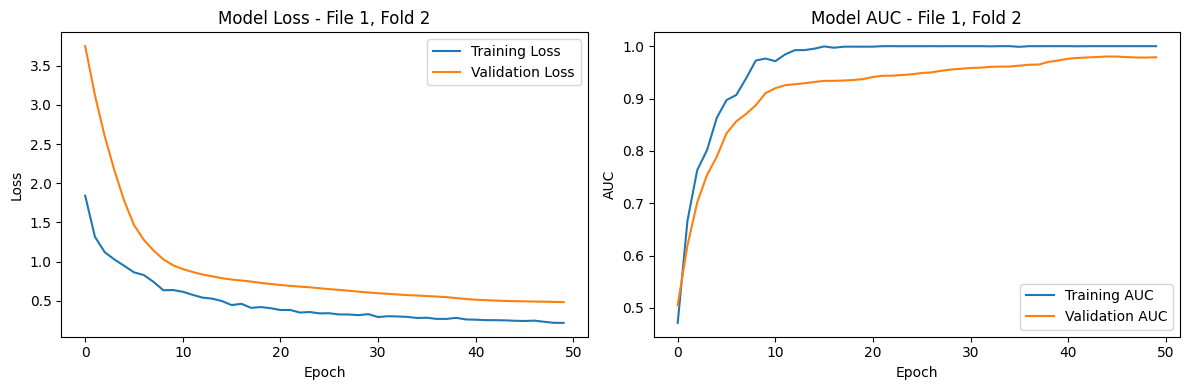

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3779 - auc: 0.6227 - loss: 1.4405 - precision: 0.4745 - recall: 0.3218 - val_accuracy: 0.5349 - val_auc: 0.7573 - val_loss: 2.0251 - val_precision: 0.5366 - val_recall: 0.5116
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7128 - auc: 0.8654 - loss: 0.9045 - precision: 0.7677 - recall: 0.5810 - val_accuracy: 0.5814 - val_auc: 0.7800 - val_loss: 1.8743 - val_precision: 0.5952 - val_recall: 0.5814
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7806 - auc: 0.8853 - loss: 0.8553 - precision: 0.8277 - recall: 0.6020 - val_accuracy: 0.5814 - val_auc: 0.8054 - val_loss: 1.5022 - val_precision: 0.5952 - val_recall: 0.5814
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8062 - auc: 0.9408 - loss: 0.7258 - precision: 0.8845 - recall: 0.7063 - val_accuracy: 0.6512 - val_auc: 0.8349 - val_loss: 1.2764 - val_precision: 0.6512 - val_recall: 0.6512
Epoch 5

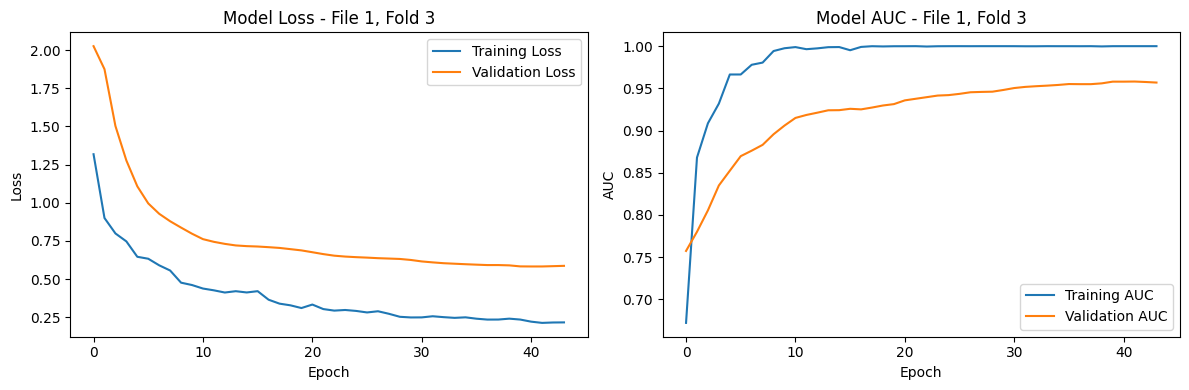

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2763 - auc: 0.4310 - loss: 1.7731 - precision: 0.2656 - recall: 0.1919 - val_accuracy: 0.4419 - val_auc: 0.6982 - val_loss: 1.7112 - val_precision: 0.4390 - val_recall: 0.4186
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6072 - auc: 0.7530 - loss: 1.1294 - precision: 0.6231 - recall: 0.4199 - val_accuracy: 0.5349 - val_auc: 0.7789 - val_loss: 1.6007 - val_precision: 0.5476 - val_recall: 0.5349
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5696 - auc: 0.7756 - loss: 1.0492 - precision: 0.6425 - recall: 0.4618 - val_accuracy: 0.6047 - val_auc: 0.8042 - val_loss: 1.4696 - val_precision: 0.6098 - val_recall: 0.5814
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6342 - auc: 0.8219 - loss: 0.9620 - precision: 0.6555 - recall: 0.4789 - val_accuracy: 0.6047 - val_auc: 0.8244 - val_loss: 1.3340 - val_precision: 0.6250 - val_recall: 0.5814
Epoch 5

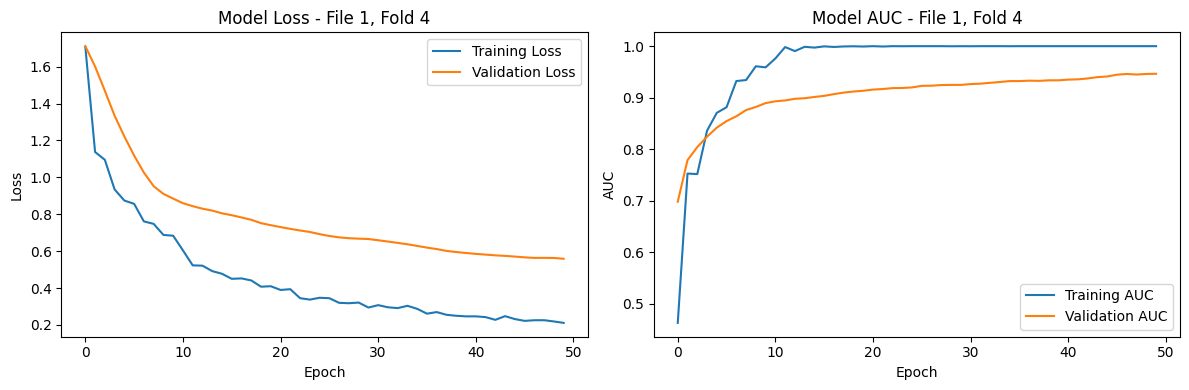

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3054 - auc: 0.5093 - loss: 1.7524 - precision: 0.3077 - recall: 0.2496 - val_accuracy: 0.3673 - val_auc: 0.5907 - val_loss: 4.6198 - val_precision: 0.3673 - val_recall: 0.3673
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6509 - auc: 0.8017 - loss: 1.0268 - precision: 0.6795 - recall: 0.5795 - val_accuracy: 0.4286 - val_auc: 0.6328 - val_loss: 3.8458 - val_precision: 0.4286 - val_recall: 0.4286
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6984 - auc: 0.8543 - loss: 0.8929 - precision: 0.7547 - recall: 0.6303 - val_accuracy: 0.4490 - val_auc: 0.6443 - val_loss: 3.1351 - val_precision: 0.4490 - val_recall: 0.4490
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6396 - auc: 0.8371 - loss: 0.9308 - precision: 0.6919 - recall: 0.5761 - val_accuracy: 0.4490 - val_auc: 0.6744 - val_loss: 2.6257 - val_precision: 0.4583 - val_recall: 0.4490
Epoch 5

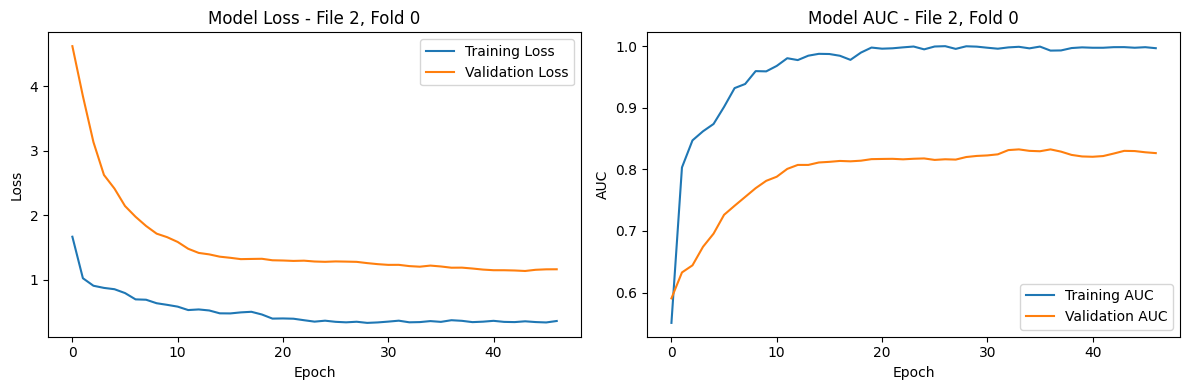

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 802ms/step - accuracy: 0.3409 - auc: 0.5361 - loss: 1.8243 - precision: 0.3209 - recall: 0.2892 - val_accuracy: 0.5102 - val_auc: 0.7125 - val_loss: 2.6041 - val_precision: 0.5102 - val_recall: 0.5102
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4376 - auc: 0.6820 - loss: 1.3122 - precision: 0.4538 - recall: 0.3896 - val_accuracy: 0.5714 - val_auc: 0.7200 - val_loss: 2.6332 - val_precision: 0.5714 - val_recall: 0.5714
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4550 - auc: 0.7148 - loss: 1.2360 - precision: 0.4833 - recall: 0.4112 - val_accuracy: 0.5714 - val_auc: 0.7118 - val_loss: 2.4070 - val_precision: 0.5714 - val_recall: 0.5714
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4549 - auc: 0.7091 - loss: 1.2354 - precision: 0.5058 - recall: 0.4131 - val_accuracy: 0.5714 - val_auc: 0.7295 - val_loss: 2.0198 - val_precision: 0.5714 - val_recall: 0.5714
Epoc

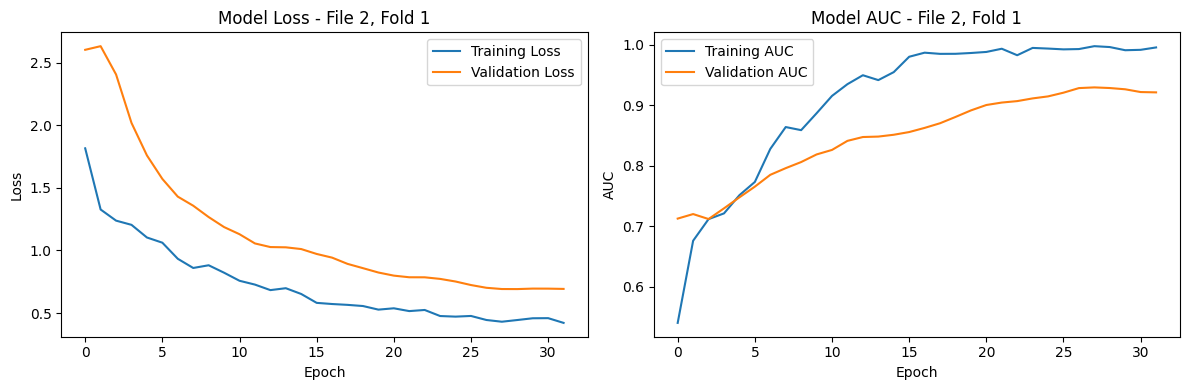

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 721ms/step - accuracy: 0.3630 - auc: 0.5817 - loss: 1.4335 - precision: 0.4124 - recall: 0.2824 - val_accuracy: 0.5102 - val_auc: 0.6725 - val_loss: 2.4318 - val_precision: 0.5106 - val_recall: 0.4898
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6077 - auc: 0.8186 - loss: 0.9791 - precision: 0.6955 - recall: 0.4886 - val_accuracy: 0.5102 - val_auc: 0.6787 - val_loss: 2.4920 - val_precision: 0.5111 - val_recall: 0.4694
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6833 - auc: 0.8551 - loss: 0.8997 - precision: 0.7411 - recall: 0.5345 - val_accuracy: 0.5102 - val_auc: 0.6962 - val_loss: 2.0071 - val_precision: 0.5217 - val_recall: 0.4898
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7088 - auc: 0.8888 - loss: 0.8432 - precision: 0.8117 - recall: 0.5738 - val_accuracy: 0.5102 - val_auc: 0.7131 - val_loss: 1.7199 - val_precision: 0.5435 - val_recall: 0.5102
Epoc

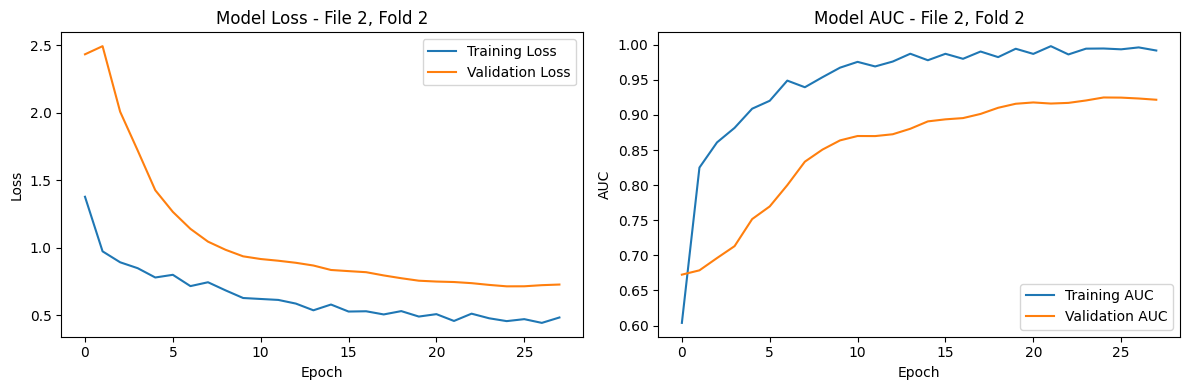

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 751ms/step - accuracy: 0.4094 - auc: 0.5618 - loss: 1.3944 - precision: 0.3509 - recall: 0.2188 - val_accuracy: 0.6531 - val_auc: 0.7673 - val_loss: 1.4960 - val_precision: 0.6739 - val_recall: 0.6327
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6264 - auc: 0.7792 - loss: 1.0315 - precision: 0.6948 - recall: 0.4482 - val_accuracy: 0.6939 - val_auc: 0.7916 - val_loss: 1.3955 - val_precision: 0.7333 - val_recall: 0.6735
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7072 - auc: 0.8890 - loss: 0.8534 - precision: 0.8811 - recall: 0.5676 - val_accuracy: 0.7143 - val_auc: 0.7979 - val_loss: 1.2550 - val_precision: 0.7391 - val_recall: 0.6939
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7806 - auc: 0.9159 - loss: 0.8018 - precision: 0.8678 - recall: 0.6255 - val_accuracy: 0.7551 - val_auc: 0.8319 - val_loss: 1.0757 - val_precision: 0.7500 - val_recall: 0.7347
Epoc

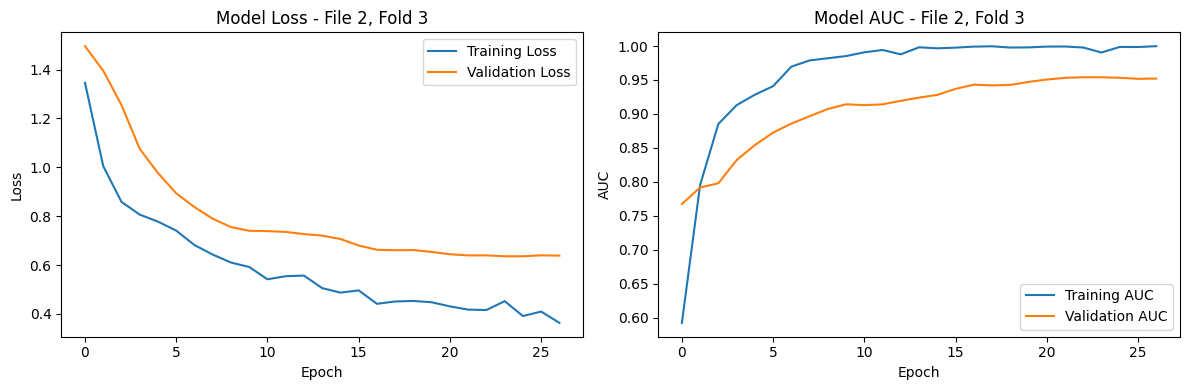

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 763ms/step - accuracy: 0.3619 - auc: 0.5509 - loss: 1.4952 - precision: 0.3728 - recall: 0.2596 - val_accuracy: 0.6327 - val_auc: 0.8527 - val_loss: 1.1377 - val_precision: 0.6744 - val_recall: 0.5918
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6375 - auc: 0.8295 - loss: 0.9505 - precision: 0.6644 - recall: 0.5466 - val_accuracy: 0.7755 - val_auc: 0.9168 - val_loss: 0.8328 - val_precision: 0.7872 - val_recall: 0.7551
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6993 - auc: 0.8699 - loss: 0.8635 - precision: 0.7344 - recall: 0.6233 - val_accuracy: 0.8163 - val_auc: 0.9372 - val_loss: 0.7259 - val_precision: 0.8085 - val_recall: 0.7755
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7691 - auc: 0.9039 - loss: 0.7769 - precision: 0.7841 - recall: 0.6647 - val_accuracy: 0.7959 - val_auc: 0.9500 - val_loss: 0.6203 - val_precision: 0.8444 - val_recall: 0.7755
Epoc

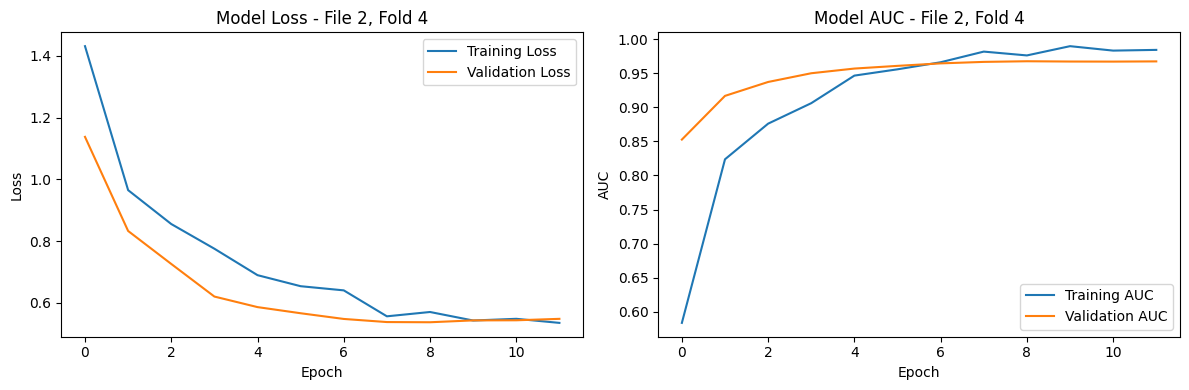

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 893ms/step - accuracy: 0.5653 - auc: 0.7694 - loss: 1.0411 - precision: 0.6302 - recall: 0.4263 - val_accuracy: 0.8209 - val_auc: 0.9259 - val_loss: 0.7763 - val_precision: 0.8182 - val_recall: 0.8060
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7890 - auc: 0.9344 - loss: 0.6955 - precision: 0.8632 - recall: 0.6618 - val_accuracy: 0.8209 - val_auc: 0.9304 - val_loss: 0.8108 - val_precision: 0.8462 - val_recall: 0.8209
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7660 - auc: 0.9268 - loss: 0.7025 - precision: 0.8103 - recall: 0.6831 - val_accuracy: 0.8209 - val_auc: 0.9329 - val_loss: 0.7872 - val_precision: 0.8594 - val_recall: 0.8209
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8319 - auc: 0.9469 - loss: 0.6338 - precision: 0.8896 - recall: 0.7620 - val_accuracy: 0.8209 - val_auc: 0.9366 - val_loss: 0.7532 - val_precision: 0.8594 - val_recall: 0.8209
Epoc

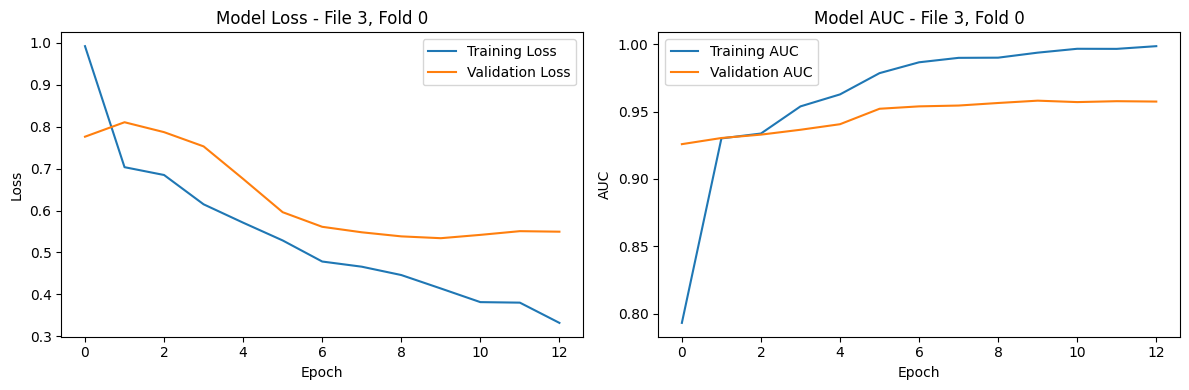

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 621ms/step - accuracy: 0.3640 - auc: 0.5199 - loss: 1.6496 - precision: 0.3840 - recall: 0.3008 - val_accuracy: 0.5821 - val_auc: 0.7384 - val_loss: 2.4770 - val_precision: 0.5846 - val_recall: 0.5672
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5100 - auc: 0.6817 - loss: 1.2528 - precision: 0.5414 - recall: 0.4092 - val_accuracy: 0.5970 - val_auc: 0.7732 - val_loss: 1.8669 - val_precision: 0.5909 - val_recall: 0.5821
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5904 - auc: 0.7571 - loss: 1.1032 - precision: 0.6374 - recall: 0.5043 - val_accuracy: 0.6418 - val_auc: 0.7995 - val_loss: 1.4229 - val_precision: 0.6508 - val_recall: 0.6119
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5812 - auc: 0.7762 - loss: 1.0379 - precision: 0.6244 - recall: 0.4673 - val_accuracy: 0.7164 - val_auc: 0.8333 - val_loss: 1.1453 - val_precision: 0.7458 - val_recall: 0.6567
Epoc

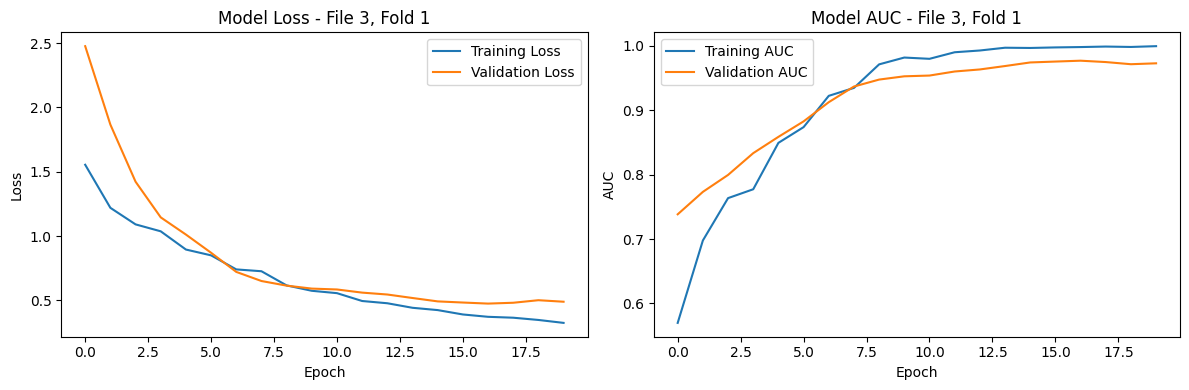

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - accuracy: 0.5331 - auc: 0.7277 - loss: 1.1279 - precision: 0.5936 - recall: 0.4365 - val_accuracy: 0.7015 - val_auc: 0.8460 - val_loss: 1.8044 - val_precision: 0.6970 - val_recall: 0.6866
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7398 - auc: 0.9058 - loss: 0.7845 - precision: 0.8518 - recall: 0.6180 - val_accuracy: 0.7463 - val_auc: 0.8577 - val_loss: 1.6484 - val_precision: 0.7576 - val_recall: 0.7463
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8103 - auc: 0.9264 - loss: 0.7227 - precision: 0.8704 - recall: 0.6911 - val_accuracy: 0.7463 - val_auc: 0.8740 - val_loss: 1.2891 - val_precision: 0.7463 - val_recall: 0.7463
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8526 - auc: 0.9667 - loss: 0.6119 - precision: 0.9146 - recall: 0.7619 - val_accuracy: 0.7463 - val_auc: 0.8831 - val_loss: 1.0953 - val_precision: 0.7463 - val_recall: 0.7463
Epoc

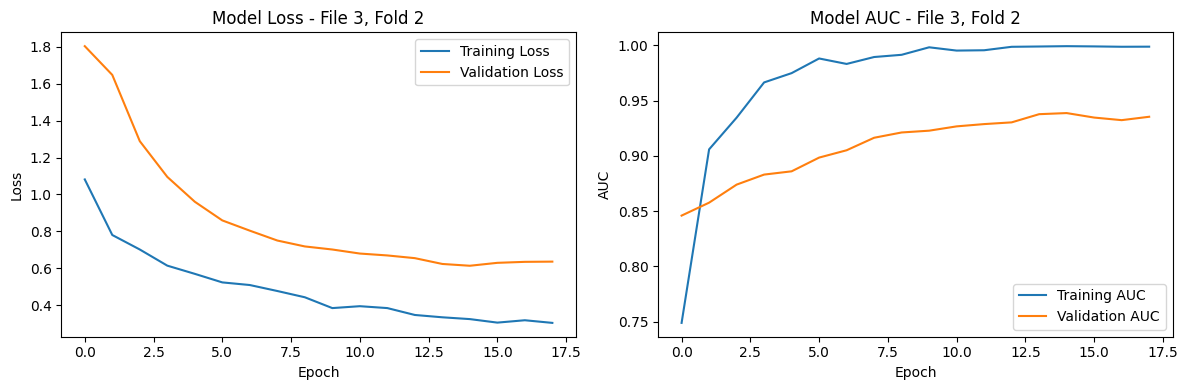

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step - accuracy: 0.4501 - auc: 0.6467 - loss: 1.2560 - precision: 0.5038 - recall: 0.3422 - val_accuracy: 0.8358 - val_auc: 0.9494 - val_loss: 0.5891 - val_precision: 0.8413 - val_recall: 0.7910
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6212 - auc: 0.8127 - loss: 0.9577 - precision: 0.6971 - recall: 0.4711 - val_accuracy: 0.7612 - val_auc: 0.9446 - val_loss: 0.5987 - val_precision: 0.7742 - val_recall: 0.7164
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6924 - auc: 0.8454 - loss: 0.8983 - precision: 0.7471 - recall: 0.5643 - val_accuracy: 0.8209 - val_auc: 0.9539 - val_loss: 0.5736 - val_precision: 0.8361 - val_recall: 0.7612
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7227 - auc: 0.8921 - loss: 0.7968 - precision: 0.7927 - recall: 0.6177 - val_accuracy: 0.8507 - val_auc: 0.9617 - val_loss: 0.5404 - val_precision: 0.8871 - val_recall: 0.8209
Epoc

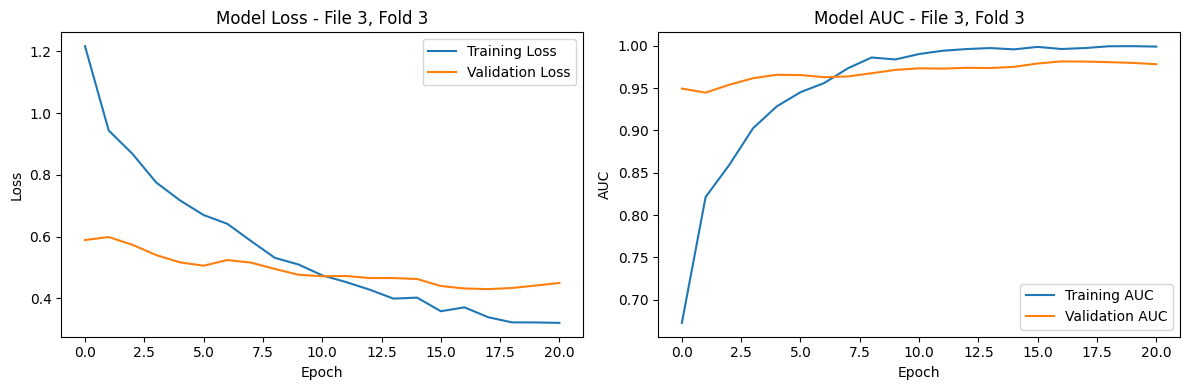

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 906ms/step - accuracy: 0.2977 - auc: 0.5115 - loss: 1.6743 - precision: 0.3209 - recall: 0.2566 - val_accuracy: 0.4545 - val_auc: 0.6024 - val_loss: 2.8134 - val_precision: 0.4545 - val_recall: 0.4545
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4661 - auc: 0.6866 - loss: 1.2058 - precision: 0.5139 - recall: 0.3915 - val_accuracy: 0.4394 - val_auc: 0.6579 - val_loss: 2.3548 - val_precision: 0.4394 - val_recall: 0.4394
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5656 - auc: 0.7507 - loss: 1.0704 - precision: 0.5955 - recall: 0.4654 - val_accuracy: 0.5606 - val_auc: 0.7237 - val_loss: 1.6783 - val_precision: 0.5692 - val_recall: 0.5606
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6125 - auc: 0.8022 - loss: 0.9724 - precision: 0.6603 - recall: 0.5101 - val_accuracy: 0.6515 - val_auc: 0.7906 - val_loss: 1.2485 - val_precision: 0.6462 - val_recall: 0.6364
Epoc

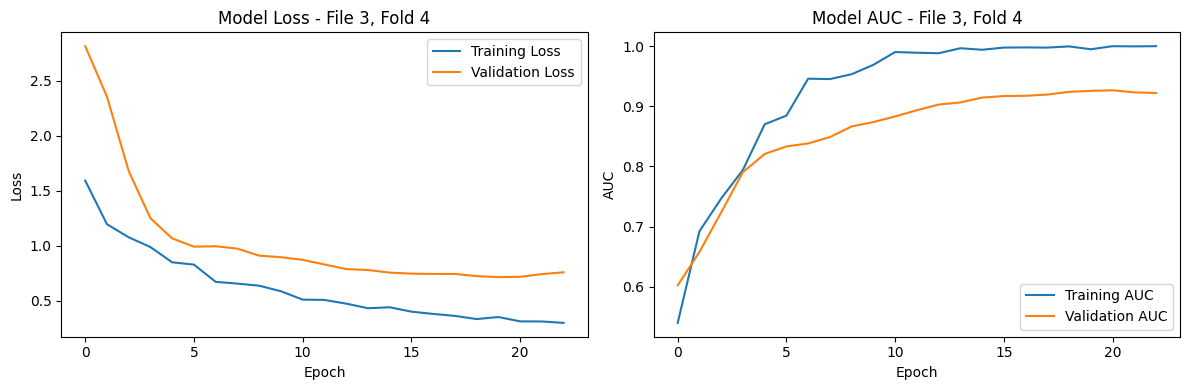

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 868ms/step - accuracy: 0.2541 - auc: 0.4685 - loss: 1.6305 - precision: 0.2639 - recall: 0.1864 - val_accuracy: 0.3134 - val_auc: 0.5322 - val_loss: 3.6045 - val_precision: 0.3182 - val_recall: 0.3134
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5041 - auc: 0.7133 - loss: 1.1929 - precision: 0.5281 - recall: 0.3650 - val_accuracy: 0.4328 - val_auc: 0.6165 - val_loss: 2.7496 - val_precision: 0.4394 - val_recall: 0.4328
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6289 - auc: 0.7947 - loss: 1.0352 - precision: 0.7008 - recall: 0.5260 - val_accuracy: 0.5075 - val_auc: 0.6786 - val_loss: 2.0390 - val_precision: 0.5484 - val_recall: 0.5075
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6853 - auc: 0.8352 - loss: 0.9521 - precision: 0.7295 - recall: 0.5948 - val_accuracy: 0.5970 - val_auc: 0.7269 - val_loss: 1.6466 - val_precision: 0.6290 - val_recall: 0.5821
Epoc

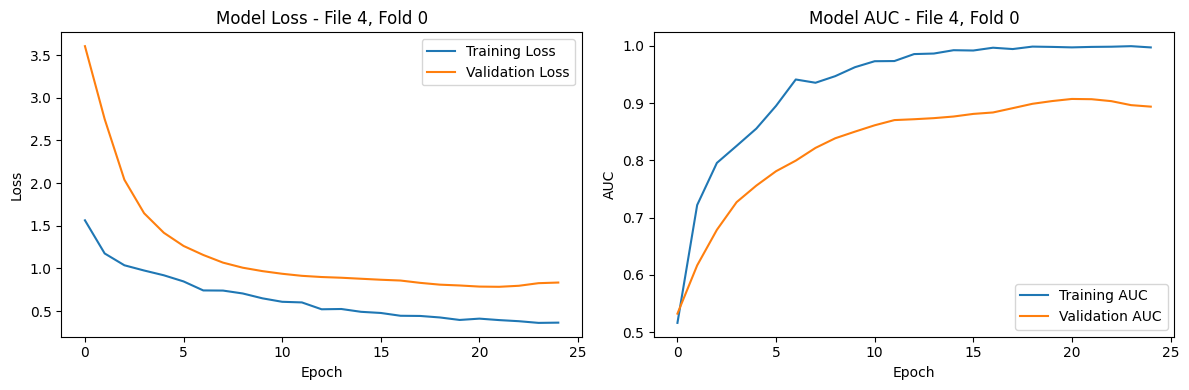

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 679ms/step - accuracy: 0.4392 - auc: 0.6108 - loss: 1.4238 - precision: 0.4490 - recall: 0.3447 - val_accuracy: 0.6970 - val_auc: 0.8441 - val_loss: 1.3614 - val_precision: 0.7188 - val_recall: 0.6970
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6672 - auc: 0.8267 - loss: 0.9818 - precision: 0.7120 - recall: 0.5842 - val_accuracy: 0.7727 - val_auc: 0.8841 - val_loss: 1.0775 - val_precision: 0.7727 - val_recall: 0.7727
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6722 - auc: 0.8223 - loss: 1.0206 - precision: 0.7317 - recall: 0.5934 - val_accuracy: 0.7879 - val_auc: 0.9070 - val_loss: 0.8936 - val_precision: 0.8125 - val_recall: 0.7879
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7641 - auc: 0.8852 - loss: 0.8453 - precision: 0.8070 - recall: 0.6808 - val_accuracy: 0.8030 - val_auc: 0.9178 - val_loss: 0.7855 - val_precision: 0.8030 - val_recall: 0.8030
Epoc

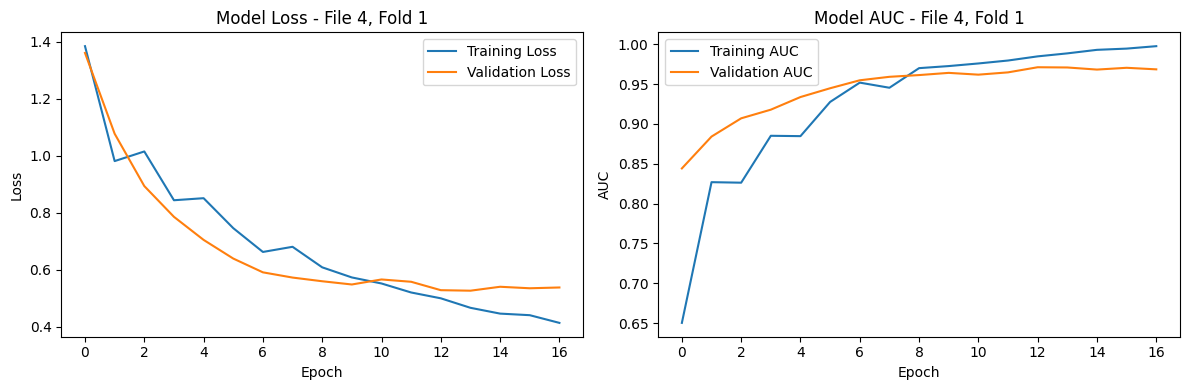

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.6369 - auc: 0.8113 - loss: 1.0306 - precision: 0.6945 - recall: 0.5542 - val_accuracy: 0.8030 - val_auc: 0.9317 - val_loss: 0.7833 - val_precision: 0.8030 - val_recall: 0.8030
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7899 - auc: 0.9298 - loss: 0.7076 - precision: 0.8380 - recall: 0.7193 - val_accuracy: 0.8333 - val_auc: 0.9330 - val_loss: 0.8192 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7800 - auc: 0.9399 - loss: 0.6735 - precision: 0.8346 - recall: 0.7271 - val_accuracy: 0.8636 - val_auc: 0.9431 - val_loss: 0.7409 - val_precision: 0.8636 - val_recall: 0.8636
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8309 - auc: 0.9575 - loss: 0.6144 - precision: 0.8666 - recall: 0.7515 - val_accuracy: 0.8485 - val_auc: 0.9470 - val_loss: 0.6641 - val_precision: 0.8485 - val_recall: 0.8485
Epoc

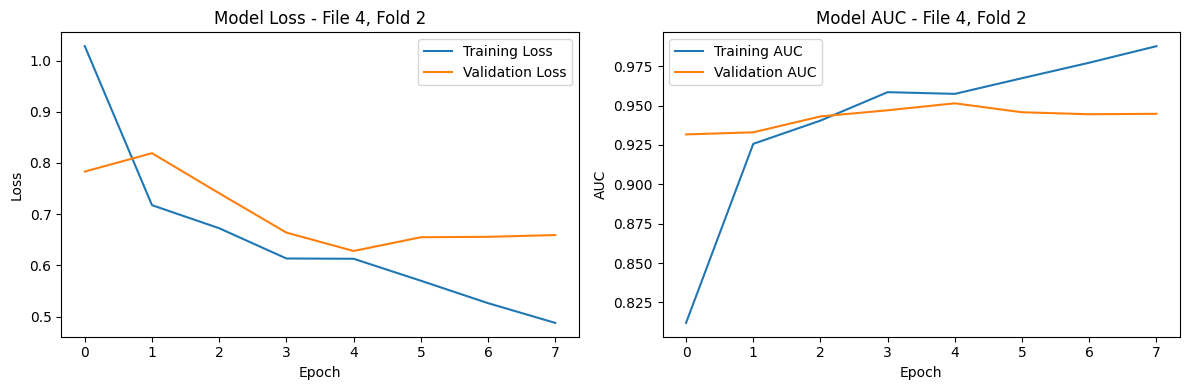

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 611ms/step - accuracy: 0.3270 - auc: 0.4687 - loss: 1.6563 - precision: 0.3371 - recall: 0.2241 - val_accuracy: 0.4394 - val_auc: 0.5664 - val_loss: 6.2091 - val_precision: 0.4286 - val_recall: 0.4091
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5422 - auc: 0.6997 - loss: 1.2596 - precision: 0.5745 - recall: 0.3900 - val_accuracy: 0.4848 - val_auc: 0.5971 - val_loss: 4.9900 - val_precision: 0.5000 - val_recall: 0.4545
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6725 - auc: 0.7965 - loss: 1.0780 - precision: 0.7036 - recall: 0.4912 - val_accuracy: 0.5000 - val_auc: 0.6182 - val_loss: 3.8976 - val_precision: 0.5424 - val_recall: 0.4848
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7007 - auc: 0.8266 - loss: 1.0193 - precision: 0.7943 - recall: 0.5710 - val_accuracy: 0.5152 - val_auc: 0.6462 - val_loss: 3.0053 - val_precision: 0.5410 - val_recall: 0.5000
Epoc

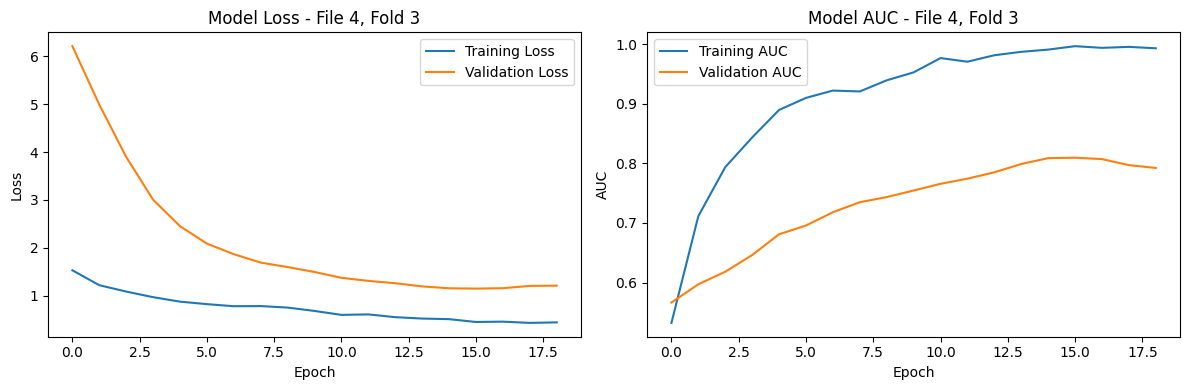

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.5462 - auc: 0.6924 - loss: 1.2693 - precision: 0.5602 - recall: 0.4525 - val_accuracy: 0.6970 - val_auc: 0.7832 - val_loss: 2.2013 - val_precision: 0.6970 - val_recall: 0.6970
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7321 - auc: 0.8748 - loss: 0.8549 - precision: 0.7638 - recall: 0.6437 - val_accuracy: 0.7424 - val_auc: 0.8895 - val_loss: 1.2534 - val_precision: 0.7424 - val_recall: 0.7424
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7017 - auc: 0.8795 - loss: 0.8323 - precision: 0.7390 - recall: 0.6345 - val_accuracy: 0.7576 - val_auc: 0.9040 - val_loss: 0.9670 - val_precision: 0.7538 - val_recall: 0.7424
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7736 - auc: 0.9183 - loss: 0.7509 - precision: 0.8461 - recall: 0.6918 - val_accuracy: 0.7576 - val_auc: 0.9125 - val_loss: 0.8915 - val_precision: 0.7778 - val_recall: 0.7424
Epoc

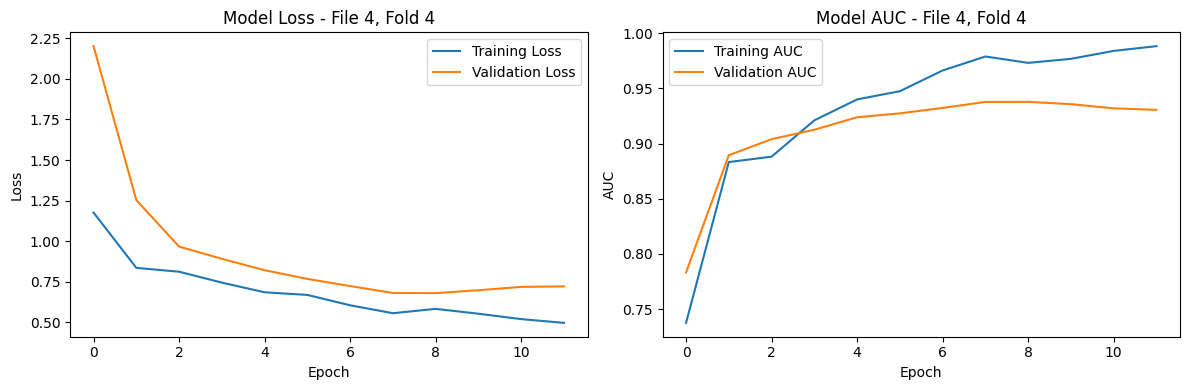

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [5]:
# Cross-validation using stratified k-Fold masks
n_folds = len(all_masks[0])
results = []

for file_idx, (X, y, masks) in enumerate(zip(all_X, all_y, all_masks)):
    file_results = []
    n_classes = len(np.unique(y))
    for fold_idx, val_mask in enumerate(masks):
        train_mask = ~val_mask
        X_train, y_train = X[train_mask], y[train_mask]
        X_val, y_val = X[val_mask], y[val_mask]

        # Scale using only the training data to prevent data leakage
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        # One-hot encode labels for keras if multiclass
        if len(np.unique(y_train)) > 2:
            # Create mapping from original labels to consecutive indices
            unique_labels = sorted(np.unique(y_train))
            label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
            idx_to_label = {idx: label for label, idx in label_to_idx.items()}
            
            # Map labels to consecutive indices
            y_train_mapped = np.array([label_to_idx[label] for label in y_train])
            y_val_mapped = np.array([label_to_idx[label] for label in y_val])
            
            n_classes = len(unique_labels)
            y_train_cat = keras.utils.to_categorical(y_train_mapped, num_classes=n_classes)
            y_val_cat = keras.utils.to_categorical(y_val_mapped, num_classes=n_classes)
            loss_fn = "categorical_crossentropy"
            activation = "softmax"
        else:
            y_train_cat = y_train
            y_val_cat = y_val
            n_classes = 2
            loss_fn = "binary_crossentropy"
            activation = "sigmoid"

        # Build model
        model = keras.Sequential()
        model.add(layers.Input(shape=(X_train.shape[1],)))
        model.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(negative_slope=0.01))
        model.add(layers.Dropout(0.3)) 
        model.add(layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.001)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(negative_slope=0.01))
        model.add(layers.Dropout(0.3))  
        model.add(layers.Dense(n_classes if n_classes > 2 else 1, activation=activation))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=loss_fn,
            metrics=["accuracy", "precision", "recall", AUC(name='auc')]
        )

        # Train model with Early Stopping and Learning Rate Scheduling; store history
        history = model.fit(
            X_train_scaled, y_train_cat,
            epochs=50,
            batch_size=64,
            verbose=1,
            validation_data=(X_val_scaled, y_val_cat),
            callbacks = [
                EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
              # ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
            ]
        )

        # Plot learning curves for this fold
        plt.figure(figsize=(12, 4))
        
        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss - File {file_idx}, Fold {fold_idx}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot AUC
        plt.subplot(1, 2, 2)
        plt.plot(history.history['auc'], label='Training AUC')
        plt.plot(history.history['val_auc'], label='Validation AUC')
        plt.title(f'Model AUC - File {file_idx}, Fold {fold_idx}')
        plt.xlabel('Epoch')
        plt.ylabel('AUC')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

        # Predict
        if n_classes > 2:
            y_pred_proba = model.predict(X_val_scaled)
            y_pred_idx = np.argmax(y_pred_proba, axis=1)
            # Map back to original labels
            y_pred_class = np.array([idx_to_label[idx] for idx in y_pred_idx])
        else:
            y_pred_proba = model.predict(X_val_scaled).flatten()
            y_pred_class = (y_pred_proba > 0.5).astype(int)

        # Metrics
        avg = 'weighted'
        try:
            if n_classes > 2:
                roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr', average='weighted')
            else:
                roc_auc = roc_auc_score(y_val, y_pred_proba)
        except Exception:
            roc_auc = np.nan

        metrics = {
            "accuracy": accuracy_score(y_val, y_pred_class),
            "precision": precision_score(y_val, y_pred_class, average=avg, zero_division=0),
            "recall": recall_score(y_val, y_pred_class, average=avg, zero_division=0),
            "f1": f1_score(y_val, y_pred_class, average=avg, zero_division=0),
            "roc_auc": roc_auc,
            "confusion_matrix": confusion_matrix(y_val, y_pred_class, labels=sorted(np.unique(y))).tolist(),
            "fold": fold_idx,
            "file": selected_files[file_idx],
        }
        file_results.append(metrics)
    results.extend(file_results)

                                                    accuracy  precision  \
file                                                                      
221111_144114__binary_onlylines114378to117271 l...  0.806897   0.823219   
221111_144114__binary_onlylines145900to148050 l...  0.810465   0.844196   
221111_144114__binary_onlylines25660to28100 loe...  0.804082   0.830187   
221111_144114__binary_onlylines47178to50517 loe...  0.856038   0.861547   
221111_144114__binary_onlylines86841to90142 loe...  0.782632   0.808486   

                                                      recall        f1  \
file                                                                     
221111_144114__binary_onlylines114378to117271 l...  0.806897  0.807296   
221111_144114__binary_onlylines145900to148050 l...  0.810465  0.818293   
221111_144114__binary_onlylines25660to28100 loe...  0.804082  0.806500   
221111_144114__binary_onlylines47178to50517 loe...  0.856038  0.847511   
221111_144114__binary_onlyline

/tmp/ipykernel_10574/1605691262.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


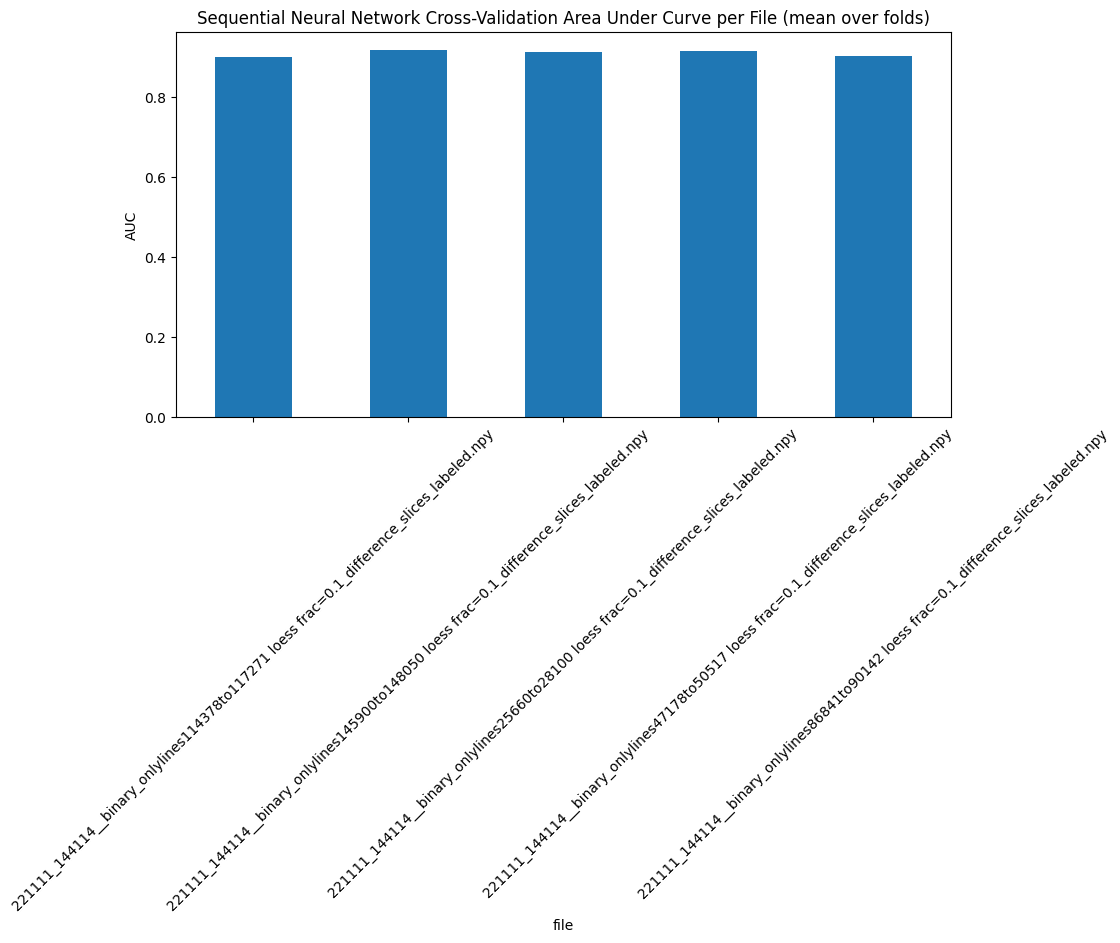

In [6]:
# Summarize results
df = pd.DataFrame(results)
print(df.groupby("file")[["accuracy", "precision", "recall", "f1", "roc_auc"]].mean())

# Optional: plot AUC per file
df.groupby("file")["roc_auc"].mean().plot.bar(rot=45, figsize=(10, 5))
plt.title("Sequential Neural Network Cross-Validation Area Under Curve per File (mean over folds)")
plt.ylabel("AUC")
plt.tight_layout()
plt.show()

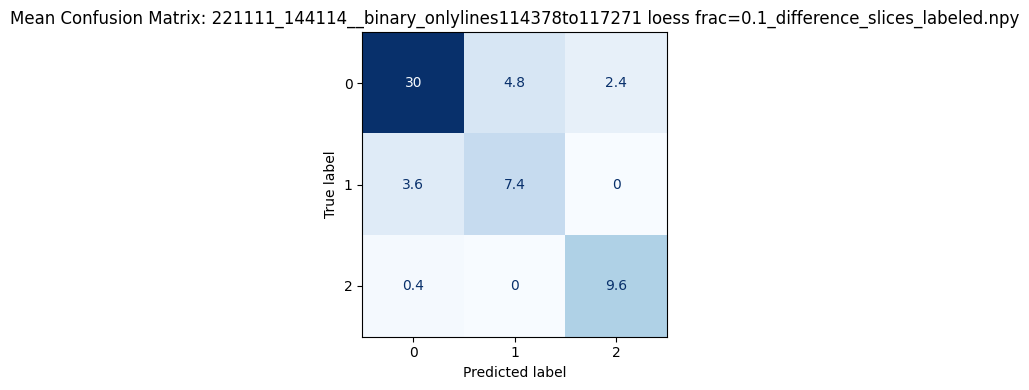

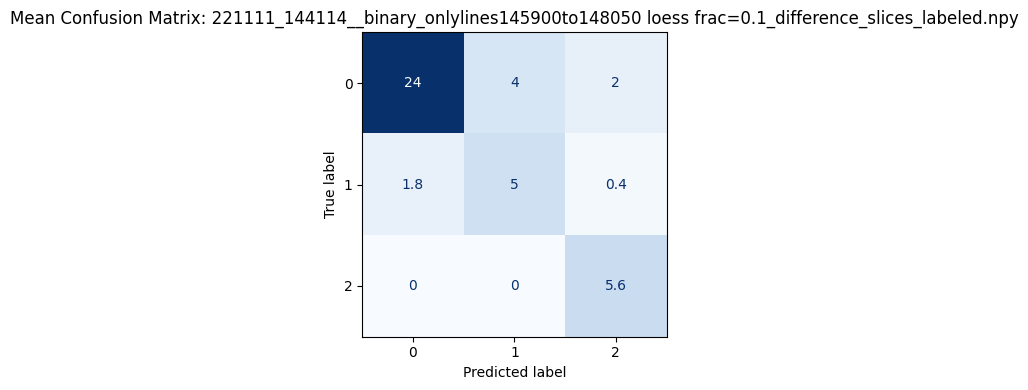

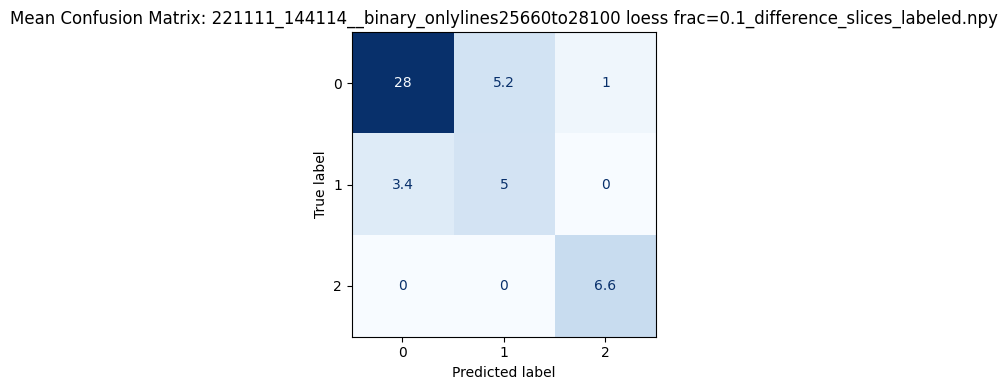

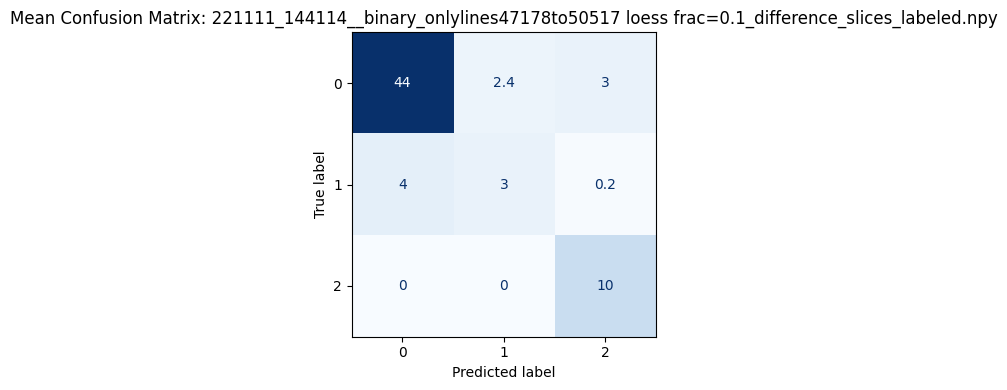

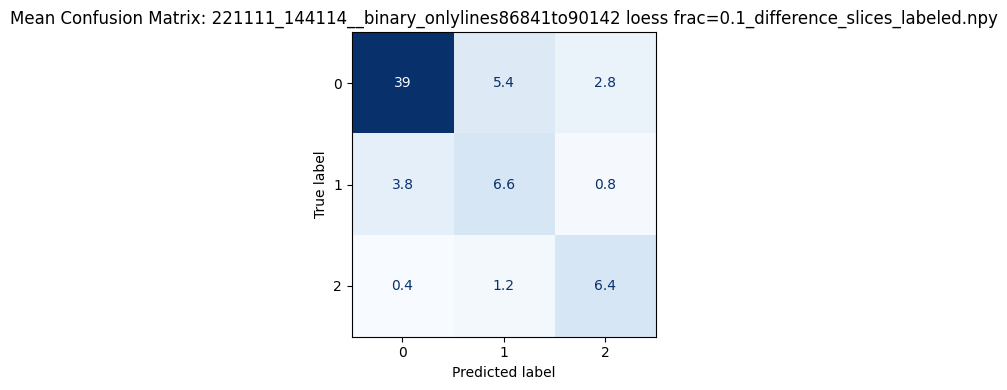

In [7]:
# Show confusion matrix for each file (mean over folds)
from sklearn.metrics import ConfusionMatrixDisplay

for file in df["file"].unique():
    cms = [np.array(row) for row in df[df["file"] == file]["confusion_matrix"]]
    # Find the largest shape
    max_dim = max(cm.shape[0] for cm in cms)
    # Pad all confusion matrices to max_dim x max_dim
    padded = []
    for cm in cms:
        pad_width = ((0, max_dim - cm.shape[0]), (0, max_dim - cm.shape[1]))
        padded.append(np.pad(cm, pad_width, mode='constant'))
    mean_cm = np.mean(padded, axis=0)
    display_labels = [str(l) for l in range(max_dim)]
    fig, ax = plt.subplots(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(mean_cm, display_labels=display_labels)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    plt.title(f"Mean Confusion Matrix: {file}")
    plt.tight_layout()
    plt.show()